# 기본 설정

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

news_dataset_path = r"/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/data/news_train.csv"

news_dataset = pd.read_csv(news_dataset_path)

del news_dataset["n_id"]
del news_dataset["date"]
del news_dataset["title"]
del news_dataset["ord"]

news_dataset = news_dataset.drop_duplicates()

news_dataset = news_dataset.groupby(["content"]).size()

print(news_dataset)

**중복 제거 전**

info
0    71813
1    46932
dtype: int64
문장의 개수 : 118745문장
문장의 최대 길이 : 3469글자
문장의 평균 길이 : 51글자


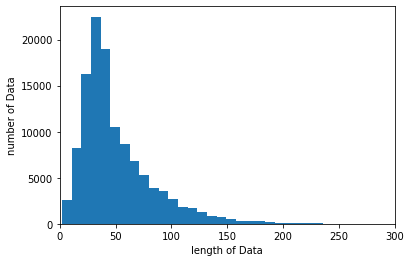

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

news_dataset_path = r"/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/data/news_train.csv"

news_dataset = pd.read_csv(news_dataset_path)

del news_dataset["n_id"]
del news_dataset["date"]
del news_dataset["title"]
del news_dataset["ord"]

news_dataset = news_dataset[news_dataset["content"]!="데이터에서 찾은 AI 속보"]
news_dataset = news_dataset[news_dataset["content"]!="씨에스윈드, 193억 원 규모 윈드타워 공급계약 체결"]
news_dataset = news_dataset[news_dataset["content"]!="씨에스윈드, 1분기 영업이익 158억 원전년비 16.1%"]

print(news_dataset.groupby(news_dataset["info"]).size())
print('문장의 개수 :', str(len(news_dataset))+'문장')
print('문장의 최대 길이 :', str(max(len(l) for l in news_dataset['content']))+'글자')
print('문장의 평균 길이 :', str(round(sum(map(len, news_dataset['content'])) / len(news_dataset['content'])))+'글자')

plt.hist([len(s) for s in news_dataset['content']], bins=400)
plt.xlim(0,300)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

**중복 제거 후**

info
0    40367
1     5791
dtype: int64
문장의 개수 : 46158문장
문장의 최대 길이 : 3469글자
문장의 평균 길이 : 63글자


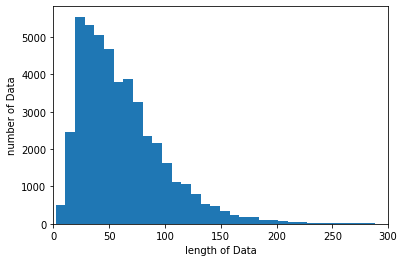

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

news_dataset_path = r"/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/data/news_train.csv"

news_dataset = pd.read_csv(news_dataset_path)

del news_dataset["n_id"]
del news_dataset["date"]
del news_dataset["title"]
del news_dataset["ord"]

news_dataset = news_dataset[news_dataset["content"]!="데이터에서 찾은 AI 속보"]
news_dataset = news_dataset[news_dataset["content"]!="씨에스윈드, 193억 원 규모 윈드타워 공급계약 체결"]
news_dataset = news_dataset[news_dataset["content"]!="씨에스윈드, 1분기 영업이익 158억 원전년비 16.1%"]

news_dataset = news_dataset.drop_duplicates()

print(news_dataset.groupby(news_dataset["info"]).size())
print('문장의 개수 :', str(len(news_dataset))+'문장')
print('문장의 최대 길이 :', str(max(len(l) for l in news_dataset['content']))+'글자')
print('문장의 평균 길이 :', str(round(sum(map(len, news_dataset['content'])) / len(news_dataset['content'])))+'글자')

plt.hist([len(s) for s in news_dataset['content']], bins=400)
plt.xlim(0,300)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [5]:
max_len = 300

# Data Preprocessing

In [6]:
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder; LE = LabelEncoder()
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler

def convert_to_ord(data):
    try:
        return [ord(xx) for xx in data]
    except:
        print(data)

news_dataset_path = r"/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/data/news_train.csv"

news_dataset = pd.read_csv(news_dataset_path)

del news_dataset["n_id"]
del news_dataset["date"]
del news_dataset["title"]
del news_dataset["ord"]

news_dataset = news_dataset[news_dataset["content"]!="데이터에서 찾은 AI 속보"]
news_dataset = news_dataset[news_dataset["content"]!="씨에스윈드, 193억 원 규모 윈드타워 공급계약 체결"]
news_dataset = news_dataset[news_dataset["content"]!="씨에스윈드, 1분기 영업이익 158억 원전년비 16.1%"]

#news_dataset = news_dataset.drop_duplicates()

news_dataset['content'] = news_dataset['content'].map(convert_to_ord)
news_dataset['info'] = LE.fit_transform(news_dataset['info'])

data = sequence.pad_sequences(news_dataset['content'], maxlen=max_len)

x_train = data
y_train = news_dataset['info']

#x_train, x_test, y_train, y_test = train_test_split(data, news_dataset['info'], test_size=0.1, random_state=42)

ros = RandomOverSampler(random_state=42)
x_train, y_train = ros.fit_resample(x_train, y_train)

#y_true = copy.deepcopy(y_test)
y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

print('train_shape : {} / {}'.format(x_train.shape, y_train.shape))
#print('test_shape : {} / {}'.format(x_test.shape, y_test.shape))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


train_shape : (143570, 300) / (143570, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# TRAIN

**Hyperparameter**

In [7]:
output_dim = 400
filters = 400
kernel_size = 5
epochs = 2**10
batch_size = 2**10

**CNN**

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Reshape, Conv2D, GlobalMaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def conv2d_cnn():
    model = Sequential()
    model.add(Embedding(input_dim=2**16, output_dim=output_dim, input_length=max_len))
    model.add(Reshape((max_len, output_dim, 1), input_shape=(max_len, output_dim)))
    model.add(Conv2D(filters=filters, kernel_size=(kernel_size, output_dim), strides=(1, 1), padding='valid'))
    model.add(GlobalMaxPooling2D())

    model.add(Dense(2**3))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(2))
    model.add(Activation('sigmoid'))
    adam = optimizers.Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    model.summary()
    early_stopping = EarlyStopping(monitor="val_loss", patience=5)
    modelcheckpoint = ModelCheckpoint('/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/model/news_model.h5', monitor='val_loss', mode='min', save_best_only=True)
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[early_stopping,modelcheckpoint])

    return model, history

if __name__ == "__main__":

    with tf.device('/device:GPU:0'):
        model, history = conv2d_cnn()

    #model.save('/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/model/news_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 400)          26214400  
_________________________________________________________________
reshape (Reshape)            (None, 300, 400, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 296, 1, 400)       800400    
_________________________________________________________________
global_max_pooling2d (Global (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 3208      
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0

**Graph**

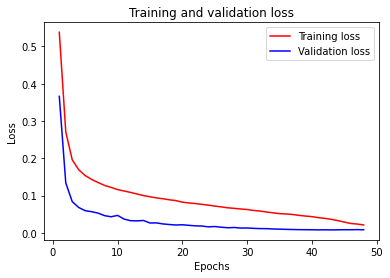

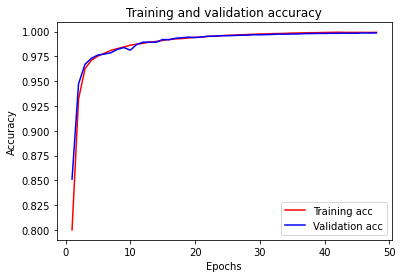

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

#y_true = list(y_true)
#y_pred = model.predict_classes(x_test)
#y_pred = list(y_pred)

#print(classification_report(y_true, y_pred))
#print(pd.crosstab(pd.Series(y_true), pd.Series(y_pred), rownames=['True'], colnames=['Predicted']))

# TEST

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import load_model

def convert_to_ord(data):
    try:
        return [ord(xx) for xx in data]
    except:
        print(data)

news_dataset_test = pd.read_csv("/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/data/news_test.csv")
del news_dataset_test["n_id"]
del news_dataset_test["date"]
del news_dataset_test["title"]
del news_dataset_test["ord"]

model = load_model('/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/model/news_model.h5')

x_test = sequence.pad_sequences(news_dataset_test['content'].map(convert_to_ord), maxlen=300)

news_dataset_test["info"] = model.predict_classes(x_test)

print(news_dataset_test.groupby("info").size())

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
info
0    88320
1    54245
dtype: int64


In [11]:
news_dataset_train = pd.read_csv("/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/data/news_train.csv")
del news_dataset_train["n_id"]
del news_dataset_train["date"]
del news_dataset_train["title"]
del news_dataset_train["ord"]
news_dataset_train = news_dataset_train[news_dataset_train["content"]!="데이터에서 찾은 AI 속보"]
news_dataset_train = news_dataset_train[news_dataset_train["content"]!="씨에스윈드, 193억 원 규모 윈드타워 공급계약 체결"]
news_dataset_train = news_dataset_train[news_dataset_train["content"]!="씨에스윈드, 1분기 영업이익 158억 원전년비 16.1%"]
news_dataset_train = news_dataset_train.drop_duplicates()

news_dataset_train = pd.DataFrame(news_dataset_train)

for i in range(len(news_dataset_test)):
    if len(news_dataset_train[news_dataset_train["content"]==news_dataset_test.iloc[i,0]]) != 0:
        news_dataset_test.iloc[i,2] = int(news_dataset_train[news_dataset_train["content"]==news_dataset_test.iloc[i,0]]["info"])

print(news_dataset_test.groupby("info").size())

info
0    88310
1    54255
dtype: int64


In [12]:
def g(x):
    if x["content"] == "데이터에서 찾은 AI 속보":
        return 1
    else:
        return x["info"]

news_dataset_test["info"] = news_dataset_test.apply(g, axis=1)

print(news_dataset_test.groupby("info").size())

info
0    88090
1    54475
dtype: int64


In [13]:
news_dataset_test = news_dataset_test[["id","info"]]

news_dataset_test.to_csv("/gdrive/My Drive/한양대학교/NH투자증권 빅데이터 경진대회/result/sample_submission.csv", index=False)